<a href="https://colab.research.google.com/github/mhdelta/machineLearningUtp/blob/master/simpleRegressionFirstLaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1 - Modelos de regresión lineal


Sea un conjunto de entrenamiento $\bf{x} = {x_1,\dots,x_N}$

El modelo de regresión de máxima verosimilitud se encuentra cuando

$\bf{w}_{ML} = (\bf{\Phi^\top\Phi})^{-1}\bf{\Phi^\top t}$

In [0]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(2000)

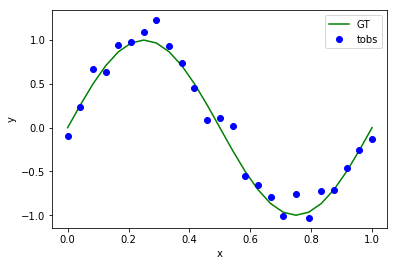

In [120]:
N = 25 #@param {type:"slider", min:0, max:100, step:1}
x = np.linspace(0, 1, N)
#print(N)
t_real = np.sin(2*np.pi*x)
t_obs = t_real +  + 0.1 * np.random.randn(N)


plt.plot(x, t_real, '-g')
plt.plot(x, t_obs, 'ob')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(('GT', 'tobs'))

Necesito encontrar w, pero para esto necesito la matriz de diseño
Pero para hacer eso tengo que crear la función base


In [0]:
# creo la matriz de diseño

def fbasePoli(xtrain, M):
  auxPhiVect = np.zeros(M)
  indM = np.linspace(0, M-1, M) #Indices de m
  auxPhiVect = np.power(xtrain, indM)
  return auxPhiVect

def fbaseExp(xtrain, M):
  auxPhiVect = np.ones(M)
  mu = np.linspace(0,1,M-1)
  s2 = 0.01
  for i in range(1,M):
    auxPhiVect[i] = np.exp(-0.5*(1/s2)*(xtrain-mu[i-1])**2)
  return auxPhiVect

def fbaseSig(xtrain, M):
  return 1
  

def desingMatrix(datos,M, func):
  auxMPHI = np.zeros((N, M))
  for n in range(0,N):
    auxMPHI[n, :] = func(datos[n], M)
  return auxMPHI

In [0]:
# Calcular la matriz phi
M = 30
MPHI = desingMatrix(x, M, fbaseExp)
MPHIT = MPHI.T
w_ml = np.linalg.inv(MPHIT@MPHI).dot(MPHIT@t_obs)
#print("El modelo w_ml es: ", w_ml)

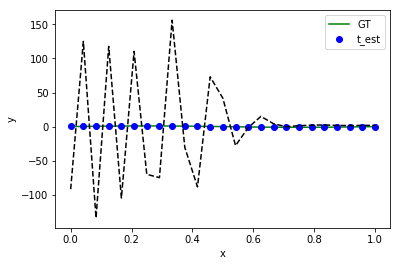

In [109]:
# Se realiza la predicción de las etiquetas


yEst = MPHI@(w_ml)

plt.plot(x, t_real, '-g')
plt.plot(x, t_obs, 'ob')
plt.plot(x, yEst, '--k')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(('GT', 't_est'))



In [110]:
# Error mse

error_mse = 0.5*(t_real-yEst).dot(t_real-yEst)
print("Error mse: ", error_mse)

# El grado de correlación cuadrático debe ser de 98
from sklearn.metrics import r2_score

print("r2: ", r2_score(t_real, yEst))


Error mse:  65423.1133852598
r2:  -10902.852230876635


# Laboratorio 2 - Modelos de regresión lineal con regularización


Sea un conjunto de entrenamiento $\bf{x} = {x_1,\dots,x_N}$

El modelo de regresión de máxima verosimilitud se encuentra cuando

$\bf{w}_{ML} = (\bf{\Phi^\top\Phi} + \lambda I)^{-1}\bf{\Phi^\top t}$

Error mse:  0.06003041682809344
r2:  0.9899949305286511


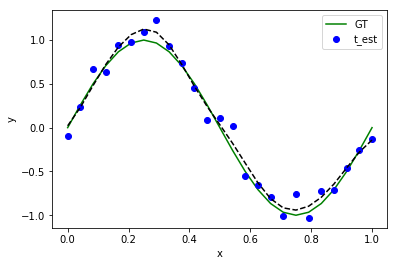

In [131]:
# Calcular la matriz phi
lam = 0.099 # valor lamba de regularización
M = 40
MPHI = desingMatrix(x, M, fbaseExp)
MPHIT = MPHI.T
w_ml_reg = np.linalg.inv(MPHIT@MPHI + lam * np.eye(M)).dot(MPHIT@t_obs)
#print("El modelo w_ml_reg es: ", w_ml_reg)
yEst = MPHI@(w_ml_reg)

plt.plot(x, t_real, '-g')
plt.plot(x, t_obs, 'ob')
plt.plot(x, yEst, '--k')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(('GT', 't_est'))
error_mse = 0.5*(t_real-yEst).dot(t_real-yEst)
print("Error mse: ", error_mse)

# El grado de correlación cuadrático debe ser de 98
from sklearn.metrics import r2_score

print("r2: ", r2_score(t_real, yEst))
